<h1>Classifying Diabetes</h1>

In this notebook, we will go through common classification models using numeric values using the following scikit-learn models:

- Logistic Regression
- Support Vector Machine
- Decision Tree
- Random Forest
- Kernal Support Vector Machine

We will use the Diabetes Health Indicators dataset (diabetes_012_health_indicators_BRFSS2015.csv) in this example.

<h4>Import and Visualizing the Data</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dib = pd.read_csv(r'Diabetes 012 Health Indicators.csv')
print(dib.shape)                          #the shape() function gives the data size (rows,columns)

(14999, 22)


In [2]:
dib.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [3]:
dib.info()
#This line is to describes null values, data type, memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_012          14999 non-null  int64
 1   HighBP                14999 non-null  int64
 2   HighChol              14999 non-null  int64
 3   CholCheck             14999 non-null  int64
 4   BMI                   14999 non-null  int64
 5   Smoker                14999 non-null  int64
 6   Stroke                14999 non-null  int64
 7   HeartDiseaseorAttack  14999 non-null  int64
 8   PhysActivity          14999 non-null  int64
 9   Fruits                14999 non-null  int64
 10  Veggies               14999 non-null  int64
 11  HvyAlcoholConsump     14999 non-null  int64
 12  AnyHealthcare         14999 non-null  int64
 13  NoDocbcCost           14999 non-null  int64
 14  GenHlth               14999 non-null  int64
 15  MentHlth              14999 non-null  int64
 16  Phys

In [4]:
dib.describe()
#Computes a summary of statistics pertaining to the DataFrame columns.

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,...,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.342356,0.469765,0.450363,0.962531,28.577905,0.451963,0.049470,0.107007,0.734182,0.602907,...,0.944063,0.100207,2.619975,3.523368,4.840989,0.203680,0.415561,8.234482,4.995666,5.860857
std,0.741085,0.499102,0.497547,0.189915,6.407562,0.497704,0.216854,0.309133,0.441782,0.489312,...,0.229808,0.300285,1.115477,7.843463,9.232241,0.402747,0.492835,2.998136,1.003419,2.139654
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


When we split the sample into a training set and a test set we need to make sure that the distribution of the different income groups is maintained in the subsamples. 

We want to avoid any situation where we have, richer households in the training sample and relatively poorer households in the testing sample. 

We can accomplish this with stratified sampling. The built in command StratifiedShuffleSplit will split the data ensuring that the distribution is maintained.

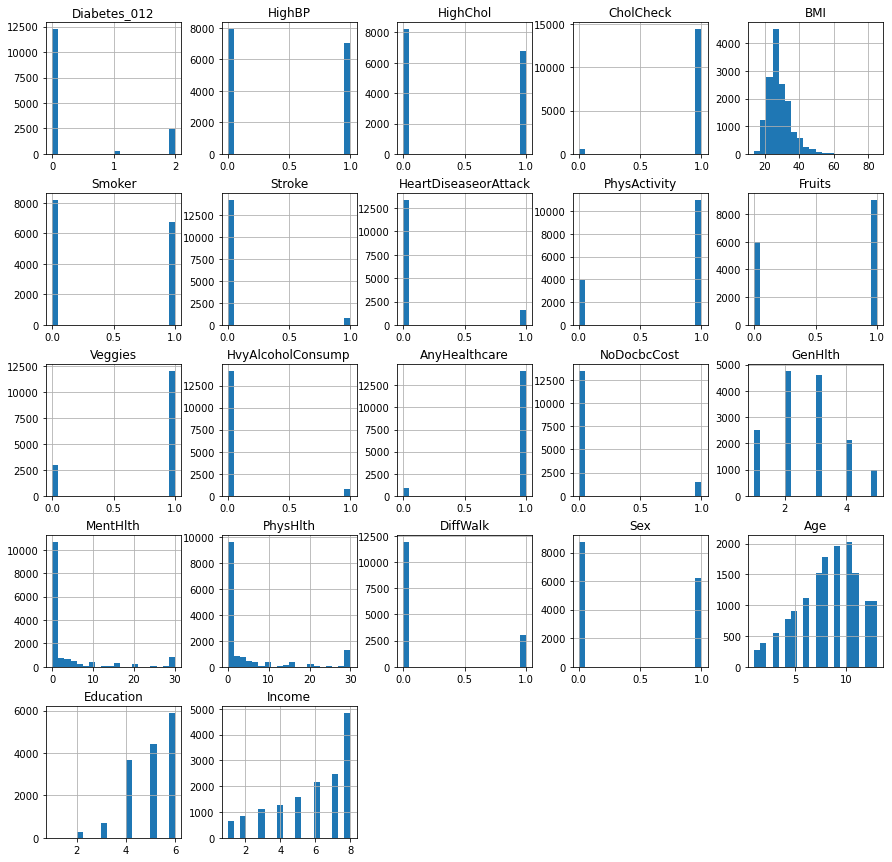

In [5]:
from matplotlib import pyplot as plt

dib.hist(bins=20, figsize=(15,15))
plt.show()

#We next start with analyzing our data using graphs and simple statistics of each column.

In [6]:
#Renaming Diabetes type from int to string for better consistency
dib['Diabetes_Type'] = dib['Diabetes_012'].replace({0.0:'Healthy', 1.0:'Pre-diabetic', 2.0:'Diabetic'})

countHealthy = len(dib[dib.Diabetes_012 == 0])
countHavePreDiabetic = len(dib[dib.Diabetes_012 == 1])
countDiabteic = len(dib[dib.Diabetes_012 == 2])
print("Percentage of Patients Are Healthy: {:.2f}%".format((countHealthy / (len(dib.Diabetes_012))*100)))
print("Percentage of Patients Have Pre-Diabetic: {:.2f}%".format((countHavePreDiabetic / (len(dib.Diabetes_012))*100)))
print("Percentage of Patients Have Diabetic: {:.2f}%".format((countDiabteic / (len(dib.Diabetes_012))*100)))

Percentage of Patients Are Healthy: 81.97%
Percentage of Patients Have Pre-Diabetic: 1.83%
Percentage of Patients Have Diabetic: 16.20%


In [7]:
#Diabetes string added an additional column to show diabetes status. Instead of 22 rows, we now have 23
dib.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_Type
0,0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,Healthy
1,0,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,Healthy
2,0,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,Healthy
3,0,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,Healthy
4,0,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,Healthy


In [8]:
#Check how many respondents have no diabetes (0), prediabetes (1) or diabetes (2). Note the class imbalance!
dib.groupby(['Diabetes_Type']).size()

Diabetes_Type
Diabetic         2430
Healthy         12294
Pre-diabetic      275
dtype: int64

C:\Users\prite\anaconda3\anaconda3-new2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Diabetes_012'>

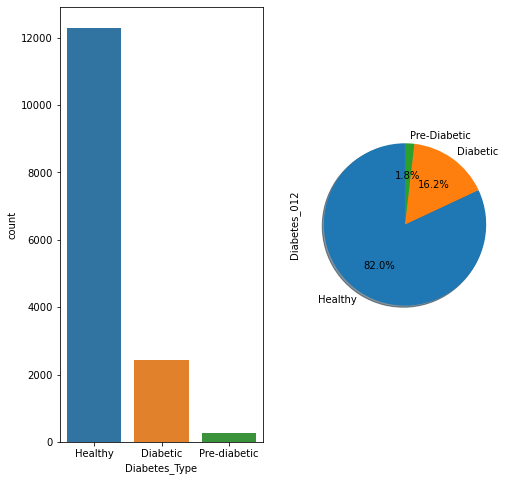

In [9]:
# countplot----Plot the frequency of the Diabetes_012

fig1, ax1 = plt.subplots(1,2,figsize=(8,8))

#It shows the count of observations in each categorical bin using bars

sns.countplot(dib['Diabetes_Type'],ax=ax1[0])

#Find the % of diabetic and Healthy person

labels = 'Healthy','Diabetic', 'Pre-Diabetic'

dib.Diabetes_012.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

HighBP,0,1
Diabetes_Type,,
Diabetic,575,1855
Healthy,7269,5025
Pre-diabetic,109,166


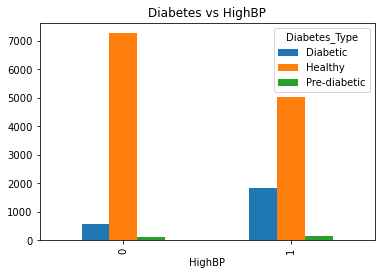

In [10]:
pd.crosstab(dib.HighBP, dib.Diabetes_Type).plot(kind = 'bar')
plt.title("Diabetes vs HighBP")
pd.crosstab(dib["Diabetes_Type"], dib["HighBP"])

0 = no high BP; 1 = high BP

HighChol,0,1
Diabetes_Type,,
Diabetic,773,1657
Healthy,7376,4918
Pre-diabetic,95,180


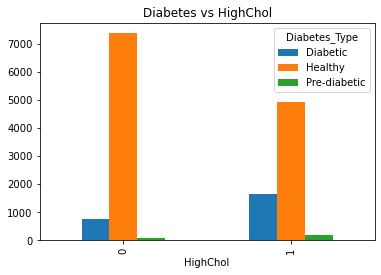

In [11]:
pd.crosstab(dib.HighChol , dib.Diabetes_Type).plot(kind = 'bar')
plt.title("Diabetes vs HighChol")
pd.crosstab(dib["Diabetes_Type"], dib["HighChol"])

0 = no high cholesterol; 1 = high cholesterol

PhysActivity,0,1
Diabetes_Type,,
Diabetic,923,1507
Healthy,2968,9326
Pre-diabetic,96,179


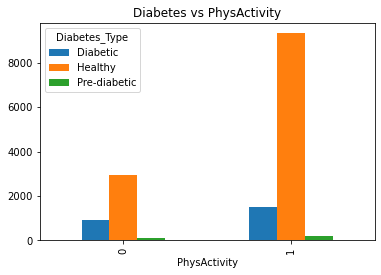

In [12]:
pd.crosstab(dib.PhysActivity, dib.Diabetes_Type).plot(kind = 'bar')
plt.title("Diabetes vs PhysActivity")
pd.crosstab(dib["Diabetes_Type"], dib["PhysActivity"])

0 = no physical activity ; 1 = yes physical activity;  in past 30 days

Age,1,2,3,4,5,6,7,8,9,10,11,12,13
Diabetes_Type,,,,,,,,,,,,,
Diabetic,6,8,17,42,67,129,195,319,390,468,350,222,217
Healthy,274,376,527,732,835,974,1310,1433,1531,1512,1161,808,821
Pre-diabetic,0,5,4,10,10,16,23,35,40,54,20,33,25


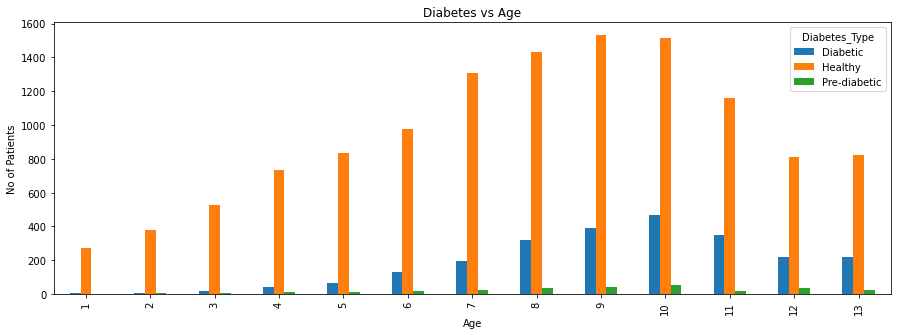

In [13]:
pd.crosstab(dib.Age, dib.Diabetes_Type).plot(kind = 'bar', figsize=(15,5))
plt.title("Diabetes vs Age")
plt.xlabel('Age')
plt.ylabel('No of Patients')
pd.crosstab(dib["Diabetes_Type"], dib["Age"])

1	Age 18 - 24
2	Age 25 to 29
3	Age 30 to 34
4	Age 35 to 39
5	Age 40 to 44
6	Age 45 to 49
7	Age 50 to 54
8	Age 55 to 59
9	Age 60 to 64
10	Age 65 to 69
11	Age 70 to 74
12	Age 75 to 79
13	Age 80 or older


BMI,14,15,16,17,18,19,20,21,22,23,...,60,61,62,63,64,66,67,73,74,85
Diabetes_Type,,,,,,,,,,,,,,,,,,,,,
Diabetic,0,0,4,6,5,11,15,39,38,67,...,1,1,2,3,0,1,1,0,0,1
Healthy,5,11,31,47,119,233,295,516,705,810,...,0,4,2,1,1,0,0,2,1,0
Pre-diabetic,1,0,1,0,1,3,2,2,7,4,...,0,0,0,0,0,0,0,0,0,0


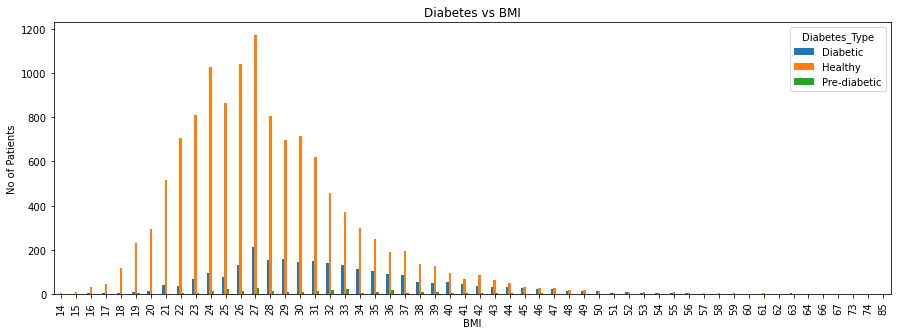

In [14]:
pd.crosstab(dib.BMI, dib.Diabetes_Type).plot(kind = 'bar', figsize=(15,5))
plt.title("Diabetes vs BMI")
plt.xlabel('BMI')
plt.ylabel('No of Patients')
pd.crosstab(dib["Diabetes_Type"], dib["BMI"])

Body Mass Index (BMI) is a person’s weight in kilograms (or pounds) divided by the square of height in meters (or feet). A high BMI can indicate high body fatness. BMI screens for weight categories that may lead to health problems, but it does not diagnose the body fatness or health of an individual.

MentHlth,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0,8527,411,616,364,168,442,33,163,31,2,...,10,2,1,5,70,1,4,21,14,561
1,155,8,18,13,3,8,3,3,0,0,...,1,0,0,0,1,1,0,2,0,28
2,1556,54,105,64,38,75,12,28,7,0,...,6,0,2,3,16,1,1,6,2,219


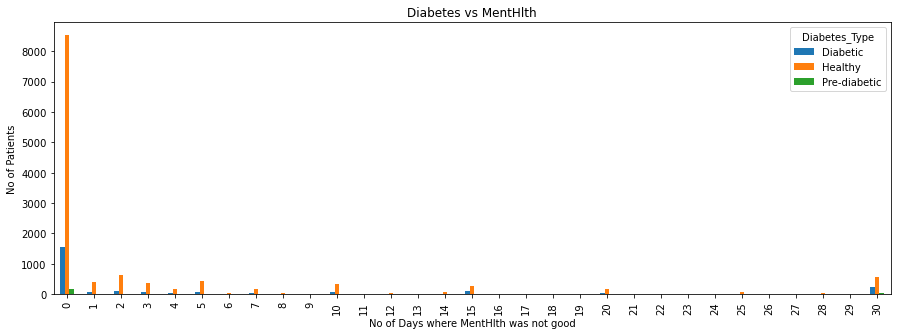

In [15]:
pd.crosstab(dib.MentHlth, dib.Diabetes_Type).plot(kind = 'bar', figsize=(15,5))
plt.title("Diabetes vs MentHlth")
plt.xlabel('No of Days where MentHlth was not good')
plt.ylabel('No of Patients')
pd.crosstab(dib["Diabetes_012"], dib["MentHlth"])

MentHlth - No of days in past 30 days patient had mental health issue.

PhysHlth,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Diabetes_Type,,,,,,,,,,,,,,,,,,,,,
Diabetic,1108,72,141,88,58,78,16,38,10,3,...,9,1,2,0,23,2,1,11,3,417
Healthy,7838,511,712,411,217,384,62,243,48,9,...,38,9,7,3,67,2,5,29,8,863
Pre-diabetic,140,9,17,10,3,11,2,6,5,0,...,1,0,1,1,1,0,1,2,0,41


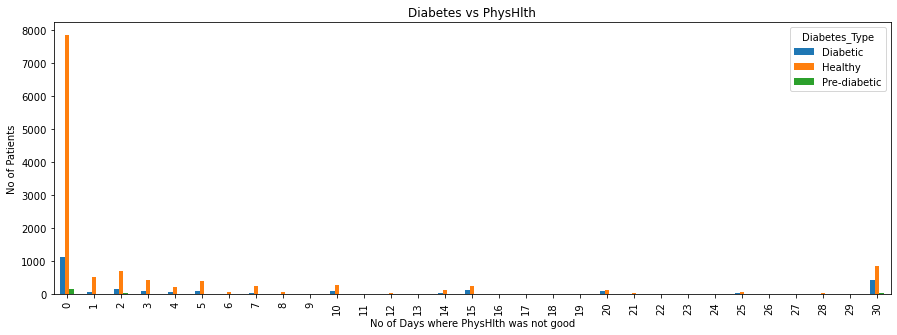

In [16]:
pd.crosstab(dib.PhysHlth, dib.Diabetes_Type).plot(kind = 'bar', figsize=(15,5))
plt.title("Diabetes vs PhysHlth")
plt.xlabel('No of Days where PhysHlth was not good')
plt.ylabel('No of Patients')
pd.crosstab(dib["Diabetes_Type"], dib["PhysHlth"])

PhysHlth - No of days in past 30 days patient had physical health issue including physical illness and injury

GenHlth,1,2,3,4,5
Diabetes_Type,,,,,
Diabetic,78,388,885,690,389
Healthy,2407,4325,3637,1367,558
Pre-diabetic,19,59,101,63,33


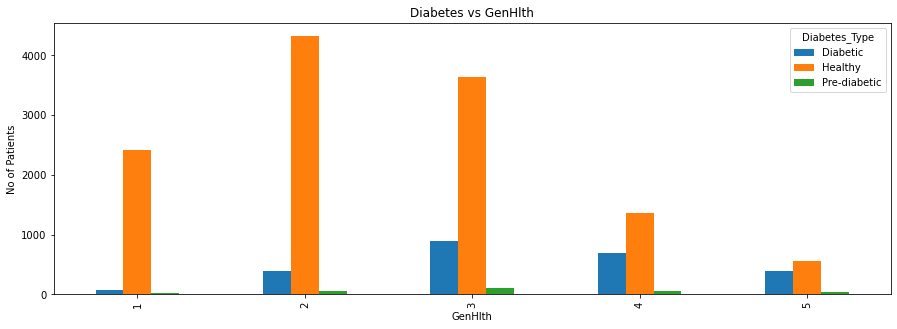

In [17]:
pd.crosstab(dib.GenHlth, dib.Diabetes_Type).plot(kind = 'bar', figsize=(15,5))
plt.title("Diabetes vs GenHlth")
plt.xlabel('GenHlth')
plt.ylabel('No of Patients')
pd.crosstab(dib["Diabetes_Type"], dib["GenHlth"])

GenHlth scale 1-5 
1 = excellent
2 = very good
3 = good
4 = fair
5 = poor

<h2>Training and Testing Data</h2>

In [18]:
#Distribution of class labels is almost even between train and test dataset. 
#The data is shuffled each time before the split is done and this is why there’s a greater chance that overlapping might be possible between train-test sets. 

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=10)

for train_index, test_index in split.split(dib, dib['Diabetes_012']):
    strat_train_set = dib.loc[train_index]
    strat_test_set = dib.loc[test_index]

#in general, we call input data X, and label data Y, so we first create trainX and trainY
trainX = strat_train_set.loc[:, 'HighBP' : 'Income']
trainY = strat_train_set.loc[:,'Diabetes_012'].values
#trainY = (trainY=='+')*1

testX = strat_test_set.loc[:,'HighBP' : 'Income']
testY = strat_test_set.loc[:,'Diabetes_012'].values
#testY = (testY=='+')*1

trainX.shape, trainY.shape, testX.shape, testY.shape

((11249, 21), (11249,), (3750, 21), (3750,))

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

num_cols = trainX.columns[(trainX.dtypes==np.int64) | (trainX.dtypes==np.float64)]

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

cat_cols = trainX.columns[trainX.dtypes==object]

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='constant',fill_value='missing')),
    ('encode', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('numeric', num_pipeline, num_cols),
    ('class', cat_pipeline, cat_cols)
])

In [20]:
import numpy as np

trainX_prc = full_pipeline.fit_transform(trainX)
trainX_prc = np.array(trainX_prc)
traindata = np.concatenate([trainY.reshape(-1,1),trainX_prc],axis=1)
pd.DataFrame(traindata).to_csv('dib_train.csv', index=False, header=False)


testX_prc = full_pipeline.transform(testX)
testX_prc = np.array(testX_prc)
testdata = np.array(testX_prc)

<h2>Modeling</h2>

Now that the data is defined, we will apply classification models below. 

<h4>Logistic Regression</h4>

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

#create new model
logistic = LogisticRegression()

#train 
logistic.fit(trainX_prc, trainY)

#get training accuracy
train_accuracy_lg = logistic.score(trainX_prc, trainY)

#get testing accuracy
test_accuracy_lg = logistic.score(testX_prc, testY)

print('Training Accuracy:', train_accuracy_lg)
print('Testing Accuracy:', test_accuracy_lg)

Training Accuracy: 0.8267401546804161
Testing Accuracy: 0.8272


<h4>Linear Support Vector Classifier</h4>

In [22]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(max_iter=5000, C=0.01)
lsvc.fit(trainX_prc, trainY)

train_accuracy_lsvm = lsvc.score(trainX_prc, trainY)

#get testing accuracy
test_accuracy_lsvm = lsvc.score(testX_prc, testY)

print('Training Accuracy:', train_accuracy_lsvm)
print('Testing Accuracy:', test_accuracy_lsvm)

Training Accuracy: 0.824962218863899
Testing Accuracy: 0.8282666666666667


<h4>Kernel Support Vector Machine</h4>

In [23]:
from sklearn.svm import SVC

svc = SVC(max_iter=5000, kernel='rbf', gamma=0.1, C=0.1)
svc.fit(trainX_prc, trainY)

train_accuracy_svm = svc.score(trainX_prc, trainY)

#get testing accuracy
test_accuracy_svm = svc.score(testX_prc, testY)

print('Training Accuracy:', train_accuracy_svm)
print('Testing Accuracy:', test_accuracy_svm)

C:\Users\prite\anaconda3\anaconda3-new2\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Training Accuracy: 0.819628411414348
Testing Accuracy: 0.8197333333333333


<h4>Decision Tree</h4>

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(trainX_prc, trainY)

train_accuracy_dt = dt.score(trainX_prc, trainY)

#get testing accuracy
test_accuracy_dt = dt.score(testX_prc, testY)

print('Training Accuracy:', train_accuracy_dt)
print('Testing Accuracy:', test_accuracy_dt)

Training Accuracy: 0.9996444128366966
Testing Accuracy: 0.7410666666666667


<h4>Random Forest</h4>

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(trainX_prc, trainY)

train_accuracy_rf = rf.score(trainX_prc, trainY)

#get testing accuracy
test_accuracy_rf = rf.score(testX_prc, testY)

print('Training Accuracy:', train_accuracy_rf)
print('Testing Accuracy:', test_accuracy_rf)

Training Accuracy: 0.9995555160458708
Testing Accuracy: 0.8144


In [26]:
#defining of feature
feature = pd.Series(rf.feature_importances_, index = trainX.columns).sort_values(ascending = False)
print(feature)

BMI                     0.173595
Age                     0.118076
Income                  0.095361
GenHlth                 0.080636
PhysHlth                0.077093
Education               0.068495
MentHlth                0.063139
HighBP                  0.039368
Smoker                  0.034385
Fruits                  0.033449
HighChol                0.032802
Sex                     0.032044
PhysActivity            0.028275
Veggies                 0.026670
DiffWalk                0.024820
HeartDiseaseorAttack    0.021948
NoDocbcCost             0.016302
Stroke                  0.013523
AnyHealthcare           0.008698
HvyAlcoholConsump       0.007417
CholCheck               0.003904
dtype: float64


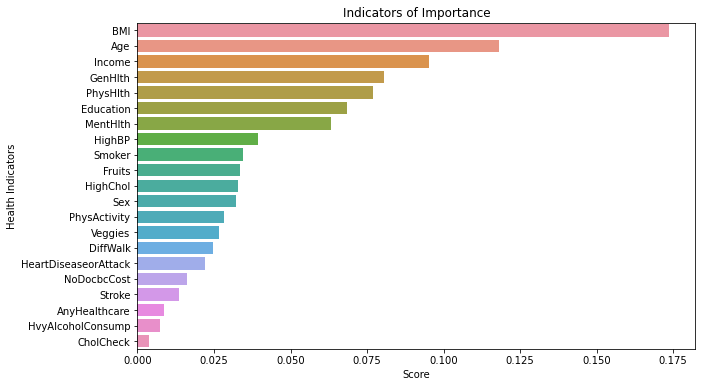

In [27]:
#visualize feature
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Indicators of Importance")
plt.xlabel('Score')
plt.ylabel('Health Indicators')
plt.show()

<h3>Fine Tune Modeling w/ Grid Search and Cross Validation</h3>
<h4>Logistic Regression</h4>

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

#hyperparameter grid for logistic regression, we only optimize regularization term C
param_grid = [{'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1 , 5, 10, 50, 100]}]

#create new model
logistic = LogisticRegression(max_iter=5000)

#perform grid search with 5-fold cross validation
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid=[{'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                                50, 100]}],
             return_train_score=True, scoring='accuracy')

Checking the best model

In [29]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 50}
0.8263845066943333


Applying it to the testing model

In [30]:
best_l2_logistic = grid_search.best_estimator_
best_l2_logistic.score(testX, testY)

0.8269333333333333

<h4>Decision Tree</h4>

In [31]:
from sklearn.tree import DecisionTreeClassifier

param_grid = [{
    'max_depth': [3,4,5,6,7],
    'max_features' : [3, 5, 7],
    'min_samples_split' : [10, 20, 30, 40],
    'min_samples_leaf' : [10, 20, 30, 40]
}]

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [3, 4, 5, 6, 7],
                          'max_features': [3, 5, 7],
                          'min_samples_leaf': [10, 20, 30, 40],
                          'min_samples_split': [10, 20, 30, 40]}],
             return_train_score=True, scoring='accuracy')

Checking for the best model

In [32]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 30, 'min_samples_split': 10}
0.8264737512968727


Applying it to the testing model

In [33]:
best_dt = grid_search.best_estimator_
best_dt.score(testX, testY)

0.8216

<h4>Random Forest</h4>

In [34]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [{
    'n_estimators' : [5, 10, 20, 50],
    'max_depth': [3, 4, 5, 6],
    'max_features' : [3, 5, 7],
    'min_samples_split' : [10, 20, 30, 40],
    'min_samples_leaf' : [10, 20, 30, 40]
}]

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [3, 4, 5, 6], 'max_features': [3, 5, 7],
                          'min_samples_leaf': [10, 20, 30, 40],
                          'min_samples_split': [10, 20, 30, 40],
                          'n_estimators': [5, 10, 20, 50]}],
             return_train_score=True, scoring='accuracy')

In [35]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 6, 'max_features': 7, 'min_samples_leaf': 30, 'min_samples_split': 30, 'n_estimators': 5}
0.8292295835186009


In [36]:
best_dt = grid_search.best_estimator_
best_dt.score(testX, testY)

0.8232

<h4>Train using the Support Vector Classifier without Hyperparameter Tuning</h4>

Results will show predicition results from the classification and confusion matrix.  

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

model = SVC()
model.fit(trainX, trainY)
predictions = model.predict(testX)
print(classification_report(testY, predictions))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      3074
           1       0.00      0.00      0.00        69
           2       0.00      0.00      0.00       607

    accuracy                           0.82      3750
   macro avg       0.27      0.33      0.30      3750
weighted avg       0.67      0.82      0.74      3750



C:\Users\prite\anaconda3\anaconda3-new2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prite\anaconda3\anaconda3-new2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prite\anaconda3\anaconda3-new2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h4>Training using the GridSearch CV model</h4>

This will create a new estimator similiar to a classifier.  

In [38]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(trainX, trainY)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.820 total time=  14.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.820 total time=  15.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.820 total time=  15.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.820 total time=  15.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.820 total time=  16.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.820 total time=   6.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.820 total time=   6.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.820 total time=   6.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.820 total time=   6.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.820 total time=   6.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.820 total time=   4.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [39]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.001)


In [40]:
grid_predictions = grid.predict(testX)
print(classification_report(testY, grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      3074
           1       0.00      0.00      0.00        69
           2       0.62      0.10      0.17       607

    accuracy                           0.83      3750
   macro avg       0.49      0.36      0.36      3750
weighted avg       0.78      0.83      0.77      3750



C:\Users\prite\anaconda3\anaconda3-new2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prite\anaconda3\anaconda3-new2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prite\anaconda3\anaconda3-new2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
